In [28]:
import numpy as np
from __future__ import print_function
import matplotlib.pyplot as plt

### Summing Fibonacci numbers

Each new term in the Fibonacci sequence is generated by adding the
previous two terms.

By starting with 1 and 2, the first 10 terms will be:


1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

By considering the terms in the Fibonacci sequence whose values do
not exceed four million,find the sum of the even-valued terms.

In [3]:
#1. Calculate phi
phi = (1 + np.sqrt(5)) / 2
print "Phi", phi

Phi 1.61803398875


In [4]:
#2. Find the index below 4 million
n = np.log(4 * 10 ** 6 * np.sqrt(5) + 0.5) / np.log(phi)
print "n: ",n

n:  33.2629480359


In [5]:
#3. Create an array of 1-n
n = np.arange(1, n)
print n

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.
  31.  32.  33.]


In [7]:
#4. Compute Fibonacci numbers
fib = (phi**n - (-1/phi) ** n) / np.sqrt(5)
print "First 9 Fibonacci Numbers: ", fib[:9]

First 9 Fibonacci Numbers:  [  1.   1.   2.   3.   5.   8.  13.  21.  34.]


In [8]:
#5. Convert to integers
fib = fib.astype(int)
print "Integers: ", fib

Integers:  [      1       1       2       3       5       8      13      21      34
      55      89     144     233     377     610     987    1597    2584
    4181    6765   10946   17711   28657   46368   75025  121393  196418
  317811  514229  832040 1346269 2178309 3524578]


In [9]:
#6. Select even-valued terms
eventerms = fib[fib % 2 == 0]
print eventerms

[      2       8      34     144     610    2584   10946   46368  196418
  832040 3524578]


In [10]:
#7. Sum the Selected terms
print eventerms.sum()

4613732


### Finding prime factors

In [15]:
#The prime factors of 13195 are 5, 7, 13 and 29.
#What is the largest prime factor of the number 600851475143 ?

N = 600851475143
LIM = 10 ** 6

def factor(n):
    #1. Create array of trial values
    a = np.ceil(np.sqrt(n))
    lim = min(n, LIM)
    
    a = np.arange(a, a + lim)
    b2 = a ** 2 - n
    
    #2. Check whether b is a square
    fractions = np.modf(np.sqrt(b2)) [0]
    
    #3. Find 0 fractions
    indices = np.where(fractions == 0)
    
    
    #4. Find the first occurence of a 0 fraction 
    a = np.ravel(np.take(a, indices))[0]   # or a = a[indices][0]
    
    a = int(a)
    b = np.sqrt(a ** 2 - n)
    b = int(b)
    c = a + b
    d = a - b
    
    if c == 1 or d == 1:
        return 
    
    print (c,d)
    factor(c)
    factor(d)
    
factor(N)

1234169 486847
1471 839
6857 71


### Finding palindromic numbers

In [8]:
#A palindromic number reads the same both ways.
#The largest palindrome made from the product of two 2-digit numbers 
#is 9009 = 91 x 99.
#Find the largest palindrome made from the product of two 3-digitnumbers.

#1. Create 3-digits numbers array
# Check the first and the last element of the array with the assert_equal()
# function from the numpy.testing package

a = np.arange(100, 1000)
np.testing.assert_equal(100, a[0])
np.testing.assert_equal(999, a[-1])

#2. Create products array
# Now we will create an array to hold all the possible products of the elements of the
# three-digit array with itself. We can accomplish this with the outer() function. The
# resulting array needs to be flattened with ravel() to be able to easily iterate over it.
# Call the sort() method on the array to make sure that the array is properly sorted

numbers = np.outer(a, a)
numbers = np.ravel(numbers)
numbers.sort()

np.testing.assert_equal(810000, len(numbers))
np.testing.assert_equal(10000, numbers[0])
np.testing.assert_equal(998001, numbers[-1])

#3. Find the largest palendromic number
for number in numbers[::-1]:
    s = str(number)
    
    if s == s[::-1]:
        print (s)
        break
        


906609


### The Steady State vector

In [12]:

from matplotlib.finance import quotes_historical_yahoo_ohlc
from datetime import date

In [24]:
today = date.today()

start = (today.year - 1, today.month, today.day)

quotes = quotes_historical_yahoo_ohlc('AAPL', start, today)
close = [q[4] for q in quotes]

states = np.sign(np.diff(close))

NDIM = 3
SM = np.zeros((NDIM, NDIM))

signs = [-1, 0, 1]
k = 1

for i, signi in enumerate(signs):
    # we start the transition from the state with the specified sign
    start_indices = np.where(states[:-1] == signi)[0]
    
    N = len(start_indices) + k * NDIM
    
    # skip since there are no transitions possible
    if N == 0:
        continue
        
    # find the values of states at the end positions
    end_values = states[start_indices + 1]
    
    for j, signj in enumerate(signs):
        # number of occurrences of this transition
        occurrences = len(end_values[end_values == signj])
        SM[i][j] = (occurrences + k) / float(N)
        
print(SM,"\n")
eig_out = np.linalg.eig(SM)
print (eig_out)


[[ 0.5         0.0078125   0.4921875 ]
 [ 0.33333333  0.33333333  0.33333333]
 [ 0.50393701  0.00787402  0.48818898]] 

(array([ 1.        , -0.00396887,  0.32549118]), array([[-0.57735027, -0.69846346,  0.01185605],
       [-0.57735027, -0.01678552, -0.99986165],
       [-0.57735027,  0.71544884,  0.01166717]]))


In [25]:
idx_vec = np.where(np.abs(eig_out[0] - 1 ) < 0.1)
print("Index eigenvalue 1", idx_vec)

x = eig_out[1][:,idx_vec].flatten()
print("steady State vector", x)
print("Check", np.dot(SM, x))

Index eigenvalue 1 (array([0], dtype=int64),)
steady State vector [-0.57735027 -0.57735027 -0.57735027]
Check [-0.57735027 -0.57735027 -0.57735027]


### Power Law

C:\Users\qubit\Anaconda2\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: divide by zero encountered in divide


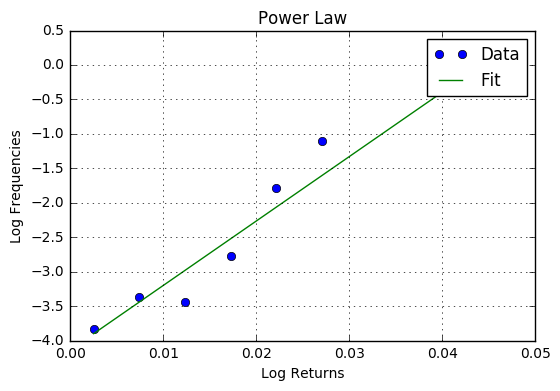

In [29]:
# Get close prices.
today = date.today()

start = (today.year - 1, today.month, today.day)

quotes = quotes_historical_yahoo_ohlc('IBM', start, today)
close = [q[4] for q in quotes]

# Get positive log returns
logreturns = np.diff(np.log(close))
pos = logreturns[logreturns > 0]

# Get frequencies of returns.
counts, rets = np.histogram(pos)

# 0 counts indices
indices0 = np.where(counts != 0)
rets = rets[:-1] + (rets[1] - rets[0]) / 2

# Could generate divide by 0 warning
freqs = 1.0/counts
freqs = np.take(freqs, indices0)[0]
rets = np.take(rets, indices0)[0]
freqs = np.log(freqs)

# Fit the frequencies and returns to a line.
p = np.polyfit(rets, freqs, 1)


# Plot the results
plt.title("Power Law")
plt.plot(rets, freqs, 'o', label='Data')
plt.plot(rets, p[0] * rets + p[1], label='Fit')
plt.xlabel('Log Returns')
plt.ylabel('Log Frequencies')
plt.legend()
plt.grid()
plt.show()

